# <CENTER> EXPLANATORY DATA ANALYSIS ON DSN PRE-QUALIFICATION DATASET</CENTER>

<b>NOTE:</b>
Below are Few of what i could compile on this notebook, you can always play around the datset for more insights

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
sns.set()
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0


In [4]:
print(train.shape)

(38312, 19)


In [19]:
import pandas_profiling as pf
pf.ProfileReport(train)

Number of variables,19
Number of observations,38312
Total Missing (%),0.2%
Total size in memory,5.6 MiB
Average record size in memory,152.0 B
Numeric,5
Categorical,10
Boolean,3
Date,0
Text (Unique),1
Rejected,0


## Univariate Analysis

In [5]:
pd.DataFrame(train['Division'].value_counts())

,Division
Commercial Sales and Marketing,11695
Customer Support and Field Operations,7973
Sourcing and Purchasing,5052
Information Technology and Solution Support,4952
Information and Strategy,3721
Business Finance Operations,1786
People/HR Management,1704
Regulatory and Legal services,733
Research and Innovation,696


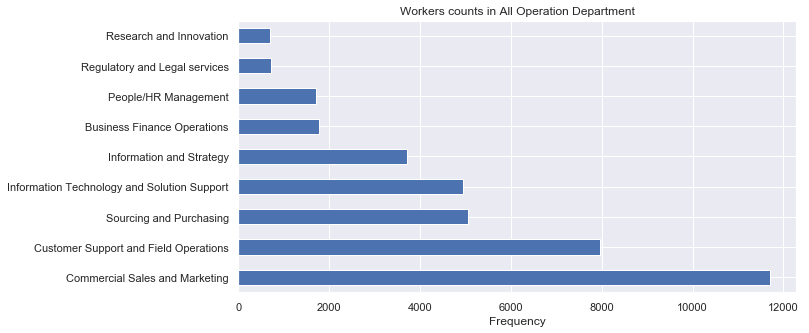

In [6]:
plt.rcParams['figure.figsize'] = [10,5]
train['Division'].value_counts().plot('barh')
plt.title('Workers counts in All Operation Department')
plt.xlabel('Frequency');

From the Above chat, The company has more workers belonging to the commercial sales and marketing operation department, followed by workers in customer support and field operation division, while distribution of other division appears to be approximately the same in pairs.

In [9]:
train['Qualification'].fillna(train['Qualification'].mode()[0], inplace = True)

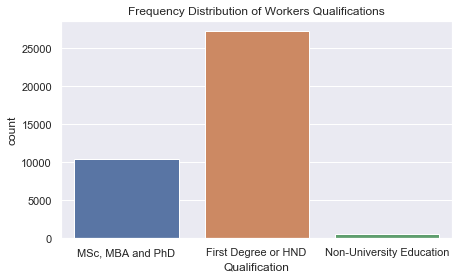

In [10]:
plt.rcParams['figure.figsize'] =(7,4)
sns.countplot(train['Qualification'], data = train)
plt.title('Frequency Distribution of Workers Qualifications');

Workers Appears to have more of First Degree od HND Qualification compared to other related categories.

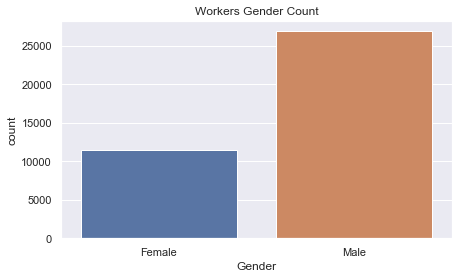

In [11]:
sns.countplot(train['Gender'])
plt.title('Workers Gender Count');

Dominant Gender in the company Appears to be Male

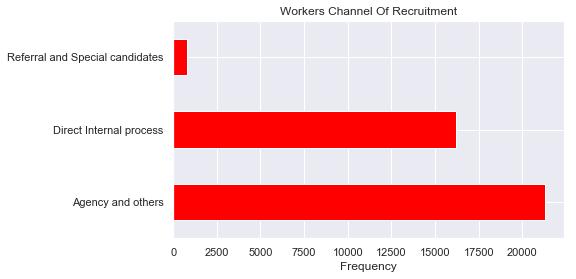

In [12]:
(train['Channel_of_Recruitment']).value_counts().plot('barh', color = 'red')
plt.title('Workers Channel Of Recruitment')
plt.xlabel('Frequency');

From the above bar chat, we can see that the company's workers are mostly recruited by direct internal process channel and agency and others channel, while fewworkers employed are candidates from referral and special candidates channel.

In [13]:
pd.DataFrame(train['Trainings_Attended'].value_counts())

,Trainings_Attended
2,30981
3,5631
4,1244
5,316
6,93
7,28
8,6
10,5
11,4
9,4


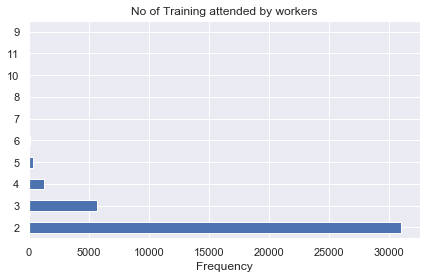

In [14]:
(train['Trainings_Attended']).value_counts().plot('barh')
plt.title('No of Training attended by workers');
plt.xlabel('Frequency');

Majority of the workers has gone for more than one Training organized by the campany, while less than a thousand workers has gone for more than 5 training as shown by the above Table.

In [43]:
train['Age'] = 2019 - train['Year_of_birth']


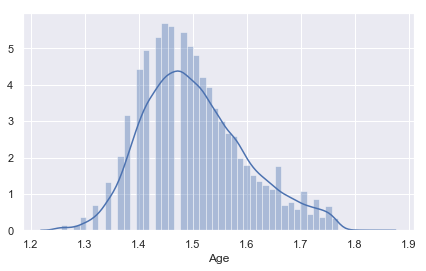

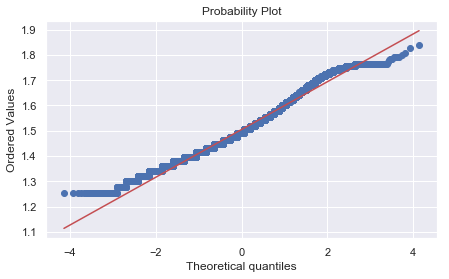

In [16]:
from scipy import stats
sns.distplot(np.log10(train['Age']))
fig = plt.figure()
res = stats.probplot(np.log10(train['Age']), plot=plt)
plt.show()

In [17]:
pd.DataFrame(train['Last_performance_score'].value_counts())

,Last_performance_score
7.5,12993
12.5,8213
10.0,6932
2.5,4325
5.0,2944
0.0,2905


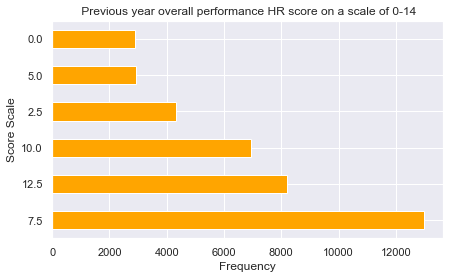

In [18]:
train['Last_performance_score'].value_counts().plot('barh', color = 'orange')
plt.title(' Previous year overall performance HR score on a scale of 0-14')
plt.xlabel('Frequency')
plt.ylabel('Score Scale');

Plotting workers Previous year overall performance HR score on a scale of 0-14, Workers prominent Score appears to be 7.5, with a total of 12993 workers falling to this category, Also we must take note of customers with HR score zero, about 2905 had their performance score to be zero

In [19]:
pd.DataFrame(train['Targets_met'].value_counts())

,Targets_met
0,24788
1,13524


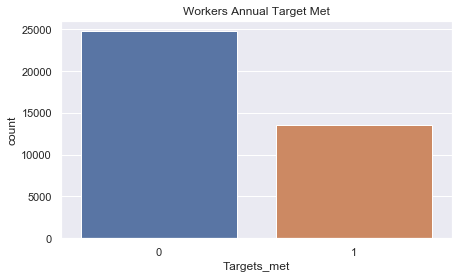

In [20]:
sns.countplot(train['Targets_met'])
plt.title('Workers Annual Target Met');

We have it from the above count plot that majority of the workers didn't meet up with their given annual target

In [21]:
pd.DataFrame(train['Previous_Award'].value_counts())

,Previous_Award
0,37425
1,887


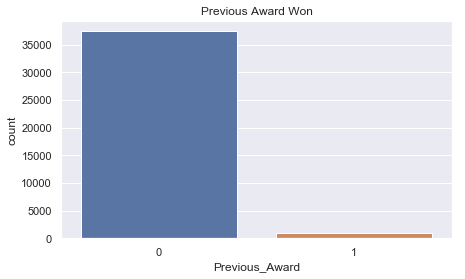

In [22]:
sns.countplot(train['Previous_Award'])
plt.title('Previous Award Won');

We can also conclude that a large number of workers has no previous company Award. as shown by the above table and graph a total of 887 workers has previous comapny award.

In [23]:
train['Training_score_average'].describe()

count    38312.000000
mean        55.366465
std         13.362741
min         31.000000
25%         43.000000
50%         52.000000
75%         68.000000
max         91.000000
Name: Training_score_average, dtype: float64

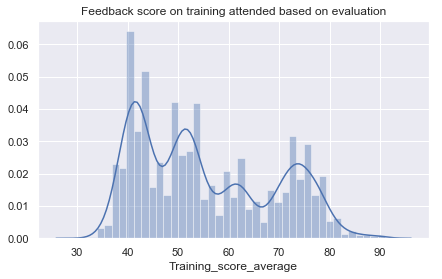

In [24]:
sns.distplot((train['Training_score_average']))
plt.title('Feedback score on training attended based on evaluation');

It appears that workers Feedback score on training attended based on evaluation is uniformly distributed as show by the above density plot

In [25]:
train['Foreign_schooled'].value_counts()

Yes    34995
No      3317
Name: Foreign_schooled, dtype: int64

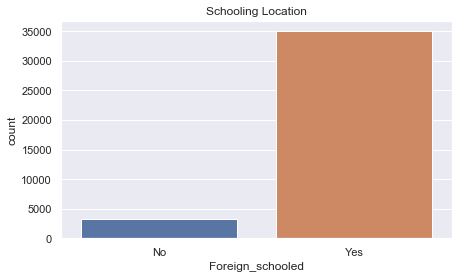

In [26]:
sns.countplot(train['Foreign_schooled'])
plt.title('Schooling Location');

From the above countplot a total of 34995 workers had their post-secondary education outside the country, giving us an insight that prominently, workers in the company had their education abroad, with few count having theirs within the country.  

In [27]:
train['Marital_Status'].value_counts()

Married     31022
Single       6927
Not_Sure      363
Name: Marital_Status, dtype: int64

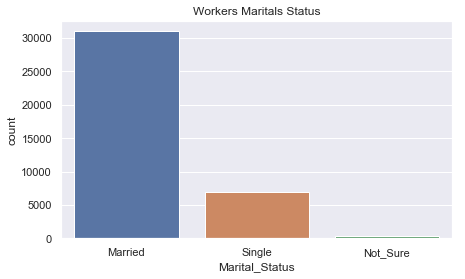

In [28]:
sns.countplot(train['Marital_Status'])
plt.title('Workers Maritals Status');

Majority of the workers are married.

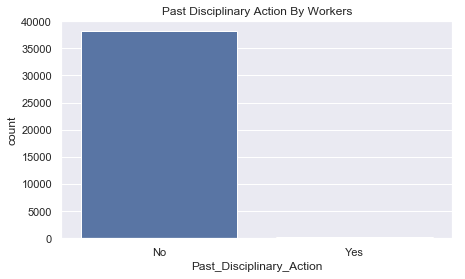

In [29]:
sns.countplot(train['Past_Disciplinary_Action']);
plt.title('Past Disciplinary Action By Workers');

Majority of the workers has no record of past disciplinary action

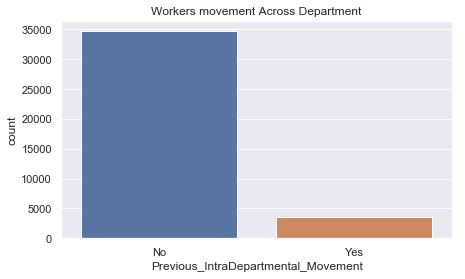

In [30]:
sns.countplot(train['Previous_IntraDepartmental_Movement'])
plt.title('Workers movement Across Department');

Few numbers of workers had the previledge to have being transferred to various department in the company.

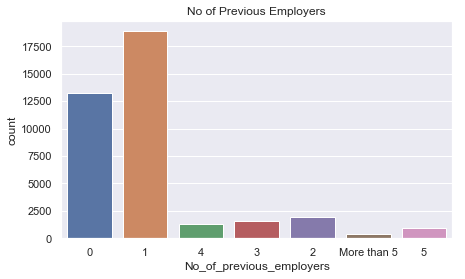

In [31]:
sns.countplot(train['No_of_previous_employers'])
plt.title('No of Previous Employers');

The most occuring count of workers with previous employer status is between 0(no previous employer status) and  1

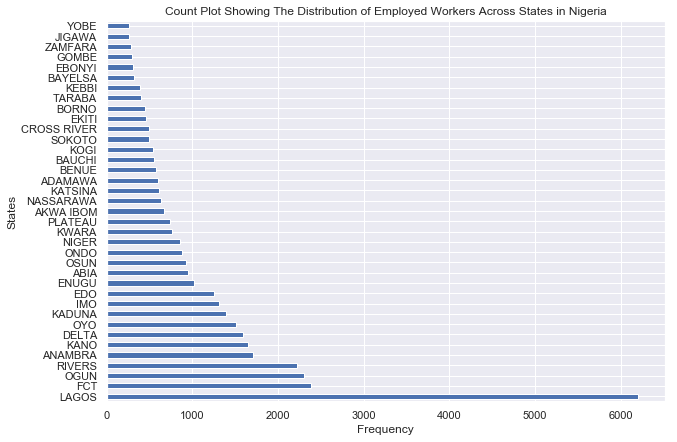

In [32]:
plt.rcParams['figure.figsize'] = [10,7]
train['State_Of_Origin'].value_counts().plot('barh');
plt.xlabel('Frequency')
plt.ylabel('States')
plt.title('Count Plot Showing The Distribution of Employed Workers Across States in Nigeria');

from the above count plot prominent workers in the film appears to be from Lagos state, while workers employed from other states depicts approximately even distribution.

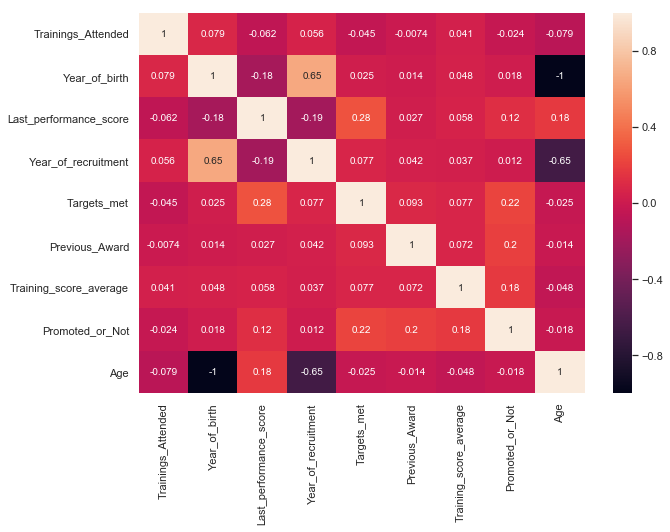

In [33]:
sns.heatmap(train.corr(), annot = True)

## Mutivariate Analysis using promoted or not

In [34]:
train.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Age'],
      dtype='object')

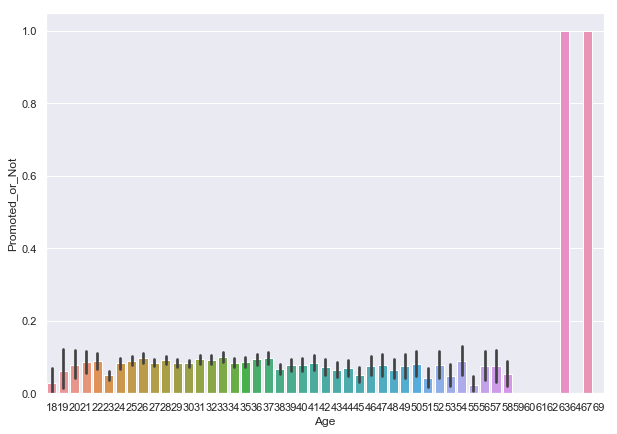

In [35]:
sns.barplot('Age', 'Promoted_or_Not', data=train)

From the above probabilistic barplot display we can say age is not a likely criteria for being promoted in the firm. we also have outliers between the range of 63 - 69

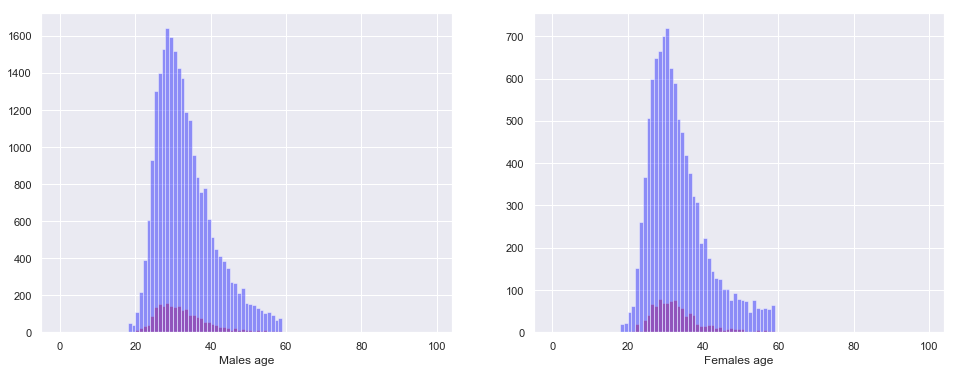

In [36]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[25,20])
plt.subplot(331)
sns.distplot(train[(train.Gender=='Male')&(train.Promoted_or_Not==1)]['Age'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.Gender=='Male')&(train.Promoted_or_Not==0)]['Age'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Males age')
plt.subplot(332)
sns.distplot(train[(train.Gender=='Female')&(train.Promoted_or_Not==1)]['Age'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.Gender=='Female')&(train.Promoted_or_Not==0)]['Age'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Females age');

For both genders, the peak in the likelihood of being promoted having happens between 20-40. Meaning, age is not a significant criteria for promotion for both genders, almost the same way, but gender has an important role.

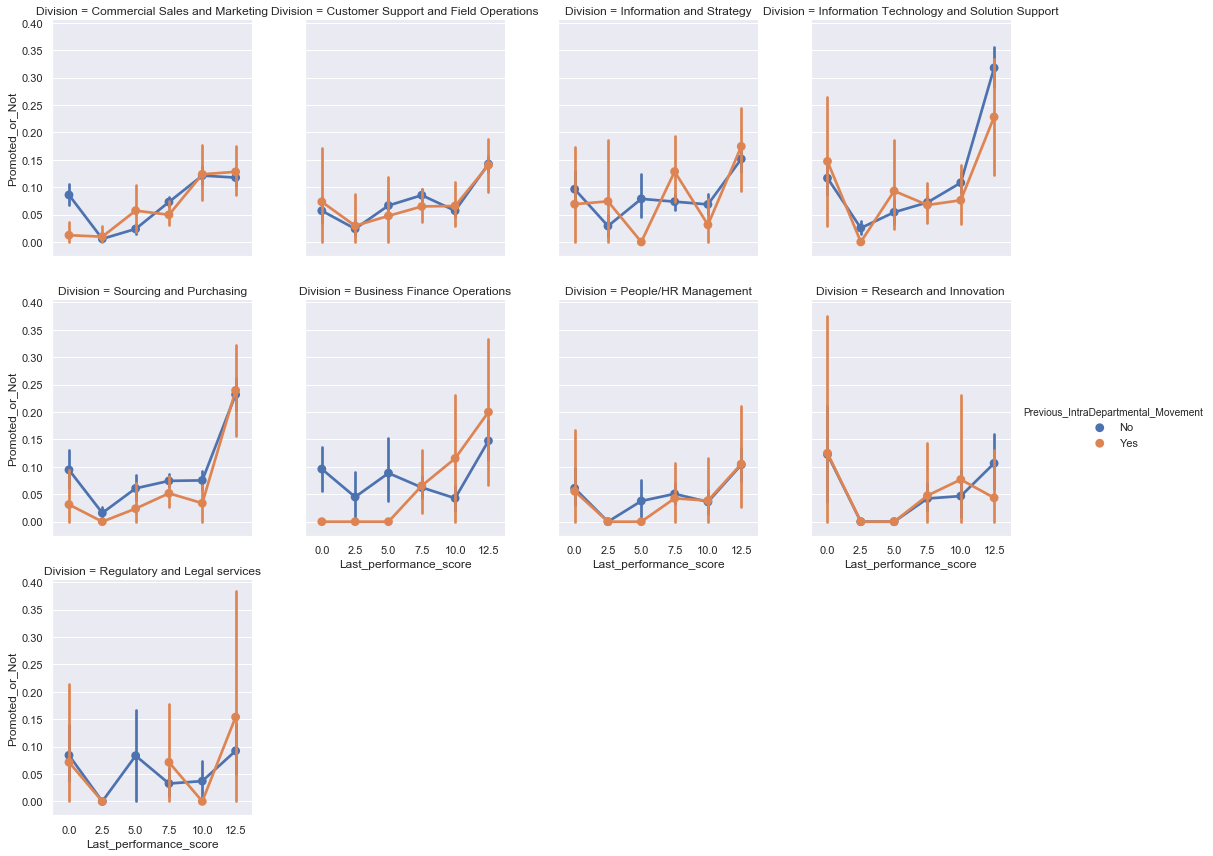

In [37]:
g = sns.factorplot(x="Last_performance_score", y="Promoted_or_Not", hue="Previous_IntraDepartmental_Movement", col="Division",
                   data=train, aspect=0.9, size=4, ci=95.0,height = 5, col_wrap = 4)

From the above factor plot we can see variations in the patterns of workers promotion posibilities based on the last training performance score across the company's work divisions. 

picking the busines finance operations division above, we can see a positive trend in posibilities of workers promotions, i.e the higher the score of the last training performance the higher the posibilities of being promoted.

And checking other division we can notice the fluctuation in promotion possibilities.

In [38]:
train.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Age'],
      dtype='object')

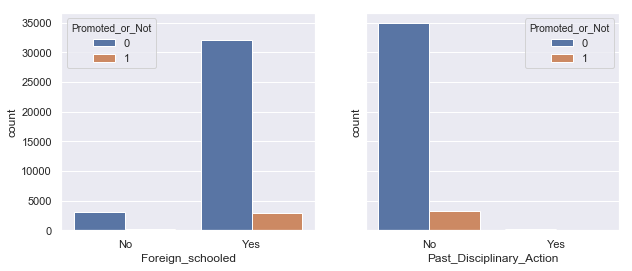

In [39]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.countplot('Foreign_schooled', hue = 'Promoted_or_Not', data = train, ax=axes[0]);
sns.countplot('Past_Disciplinary_Action', hue = 'Promoted_or_Not', data = train, ax=axes[1]);

we can see that workers who didn't school abroad weren't promoted at all by the company, compared to workers who were foreign breeds in term of education, their promotion rate appears to by high. And this was not observed on the past disciplinary action feature. 

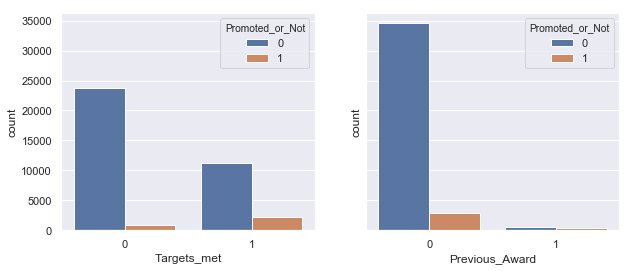

In [40]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.countplot('Targets_met', hue = 'Promoted_or_Not', data = train, ax=axes[0]);
sns.countplot('Previous_Award', hue = 'Promoted_or_Not', data = train, ax=axes[1]);

we can see that when workers tends to met their given target, promotion rate is much higher compared to when targets are not met. The same was not observed for workers with previous award or not

In [41]:
train.groupby(['State_Of_Origin'])['Promoted_or_Not'].agg([np.mean]).sort_values(by='mean', ascending = False).T

State_Of_Origin,ONDO,GOMBE,TARABA,SOKOTO,ANAMBRA,OSUN,KEBBI,BORNO,ENUGU,IMO,NASSARAWA,PLATEAU,KANO,OYO,DELTA,LAGOS,RIVERS,EKITI,AKWA IBOM,CROSS RIVER,KADUNA,YOBE,BAUCHI,EDO,ZAMFARA,FCT,KATSINA,BENUE,ADAMAWA,BAYELSA,KOGI,OGUN,NIGER,EBONYI,JIGAWA,ABIA,KWARA
mean,0.117714,0.103093,0.1,0.096192,0.095906,0.094726,0.091603,0.089485,0.08878,0.088753,0.088608,0.087957,0.087932,0.08687,0.086575,0.086074,0.085959,0.085714,0.084695,0.082828,0.082202,0.081712,0.08079,0.080222,0.07931,0.078275,0.078049,0.07772,0.077686,0.07716,0.075646,0.074718,0.071179,0.070288,0.068702,0.068421,0.067974


At first sight we can see that the promotion rate are about 10% in 3 states (ONDO, GOMBE and TARABA),compared to other state.
Even lagos with the highest number of workers has a low promotion rate.

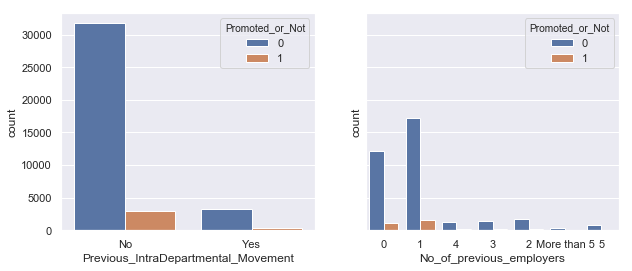

In [42]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.countplot('Previous_IntraDepartmental_Movement', hue = 'Promoted_or_Not', data = train, ax=axes[0]);
sns.countplot('No_of_previous_employers', hue = 'Promoted_or_Not', data = train, ax=axes[1]);

From the above display, we can conclude that moving from one department to another department in the company doesn't quarantee promotion, because people with no previous intra department movement have a higher promotion rate compared to those who have moved.

Same goes to the workers with more than 2 previous employers record